In [1]:
import pandas as pd
from pathlib import Path

## Find all meta files

In [2]:
meta_files = sorted(Path("data").glob("*.meta"))
display(meta_files[:3])

[PosixPath('data/2021-06-21T19:11:47+02:00_3ab02720-abbc-4fe4-b4a4-ed1269c271a1.meta'),
 PosixPath('data/2021-06-21T19:11:47+02:00_4c7c3de1-aced-48db-8a7f-47a33a4eb478.meta'),
 PosixPath('data/2021-06-21T19:11:47+02:00_7281264c-09c4-4e57-90f2-e67cc361654e.meta')]

## Reading meta data

In [3]:
def read_meta(meta_file):
    df = pd.read_csv(
        meta_file,
        delimiter=";",
        skipinitialspace=True,
        header=None)
    df = df.set_index(0).T
    df["filename_meta"] = str(meta_file)
    df["filename_log"] = str(meta_file).split(".")[:-1][0] + ".log"
    return df

In [4]:
# not really used but we might want to keep an overview of all metadata

def read_all_meta(meta_files):
    return pd.concat(map(read_meta, meta_files))

## Look at all meta data

In [5]:
df_meta = read_all_meta(meta_files)
df_meta

,timestamp,osu_exe,ntasks,nodes,tasks-per-node,constraint,nodelist,slurm_log,runtime,mpi_api,filename_meta,filename_log
1,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:47+02:00_3ab02720-abbc-4...,data/2021-06-21T19:11:47+02:00_3ab02720-abbc-4...
1,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,1,8,"cascade,mem192",neshcl126,slurm-1333636.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:47+02:00_4c7c3de1-aced-4...,data/2021-06-21T19:11:47+02:00_4c7c3de1-aced-4...
1,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:47+02:00_7281264c-09c4-4...,data/2021-06-21T19:11:47+02:00_7281264c-09c4-4...
1,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,4,2(x4),"cascade,mem192",neshcl[268-271],slurm-1333634.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:47+02:00_e73e2ae4-9358-4...,data/2021-06-21T19:11:47+02:00_e73e2ae4-9358-4...
1,2021-06-21T19:11:48+02:00,mpi/startup/osu_init,8,1,8,"cascade,mem192",neshcl126,slurm-1333636.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:48+02:00_25202405-78f3-4...,data/2021-06-21T19:11:48+02:00_25202405-78f3-4...
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2021-06-21T19:15:03+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,data/2021-06-21T19:15:03+02:00_ebbdf21e-867d-4...,data/2021-06-21T19:15:03+02:00_ebbdf21e-867d-4...
1,2021-06-21T19:15:07+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,data/2021-06-21T19:15:07+02:00_e4b88865-8423-4...,data/2021-06-21T19:15:07+02:00_e4b88865-8423-4...
1,2021-06-21T19:15:12+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,data/2021-06-21T19:15:12+02:00_80ee721d-95c4-4...,data/2021-06-21T19:15:12+02:00_80ee721d-95c4-4...
1,2021-06-21T19:15:17+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,data/2021-06-21T19:15:17+02:00_fafa6821-31c5-4...,data/2021-06-21T19:15:17+02:00_fafa6821-31c5-4...


In [6]:
df_meta["osu_exe"].unique()

array(['mpi/startup/osu_init', 'mpi/collective/osu_allgather'],
      dtype=object)

## Dispatch log parsing

In [7]:
def _read_mpi_collective_osu_allgather(log_file):
    df_raw = pd.read_csv(
        log_file,
        skiprows=3,
        delim_whitespace=True,
        header=None,
    )
    df_raw.columns = ["Size", "Avg Latency(us)"]
    
    return df_raw

In [8]:
def _read_mpi_startup_osu_init(log_file):
    df_raw = pd.read_csv(
        log_file,
        skiprows=1,
        header=None,
    )
    
    cols = df_raw.T[0].str.split(":").apply(lambda l: l[0].strip())
    vals = df_raw.T[0].str.split(":").apply(lambda l: l[1].strip())
    df = pd.DataFrame(pd.Series(vals)).set_index(cols).T
    
    return df

In [9]:
def read_log(meta_file):
    df_meta = read_meta(meta_file)
    read_funcs = {
        "mpi/startup/osu_init": _read_mpi_startup_osu_init,
        "mpi/collective/osu_allgather": _read_mpi_collective_osu_allgather,
    }
    try:
        return read_funcs[list(df_meta["osu_exe"])[0]](list(df_meta["filename_log"])[0])
    except KeyError:
        raise NotImplementedError("not implemented for {df_meta['osu_exe']}")

## Wrap meta and log reading

In [10]:
def read_log_and_meta(meta_file):
    df_log = read_log(meta_file)
    df_meta = read_meta(meta_file)
    return df_log.join(
        df_meta.reset_index().drop(columns=["index", ]).reindex(df_log.index).ffill()
    )

## Read all data

In [11]:
df = pd.concat(map(read_log_and_meta, meta_files))

In [12]:
df

,nprocs,min,max,avg,timestamp,osu_exe,ntasks,nodes,tasks-per-node,constraint,nodelist,slurm_log,runtime,mpi_api,filename_meta,filename_log,Size,Avg Latency(us)
0,8,176 ms,396 ms,286 ms,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,2,4(x2),"cascade,mem192",neshcl[173-174],slurm-1333635.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:47+02:00_3ab02720-abbc-4...,data/2021-06-21T19:11:47+02:00_3ab02720-abbc-4...,NaN,NaN
0,8,311 ms,311 ms,311 ms,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,1,8,"cascade,mem192",neshcl126,slurm-1333636.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:47+02:00_4c7c3de1-aced-4...,data/2021-06-21T19:11:47+02:00_4c7c3de1-aced-4...,NaN,NaN
0,8,124 ms,330 ms,174 ms,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:47+02:00_7281264c-09c4-4...,data/2021-06-21T19:11:47+02:00_7281264c-09c4-4...,NaN,NaN
0,8,138 ms,336 ms,196 ms,2021-06-21T19:11:47+02:00,mpi/startup/osu_init,8,4,2(x4),"cascade,mem192",neshcl[268-271],slurm-1333634.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:47+02:00_e73e2ae4-9358-4...,data/2021-06-21T19:11:47+02:00_e73e2ae4-9358-4...,NaN,NaN
0,8,305 ms,305 ms,305 ms,2021-06-21T19:11:48+02:00,mpi/startup/osu_init,8,1,8,"cascade,mem192",neshcl126,slurm-1333636.out,native_openmpi-3.1.6,pmi2,data/2021-06-21T19:11:48+02:00_25202405-78f3-4...,data/2021-06-21T19:11:48+02:00_25202405-78f3-4...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,NaN,NaN,NaN,NaN,2021-06-21T19:15:22+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,data/2021-06-21T19:15:22+02:00_5ae3e82d-beba-4...,data/2021-06-21T19:15:22+02:00_5ae3e82d-beba-4...,65536.0,647.31
17,NaN,NaN,NaN,NaN,2021-06-21T19:15:22+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,data/2021-06-21T19:15:22+02:00_5ae3e82d-beba-4...,data/2021-06-21T19:15:22+02:00_5ae3e82d-beba-4...,131072.0,1285.44
18,NaN,NaN,NaN,NaN,2021-06-21T19:15:22+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,data/2021-06-21T19:15:22+02:00_5ae3e82d-beba-4...,data/2021-06-21T19:15:22+02:00_5ae3e82d-beba-4...,262144.0,1673.16
19,NaN,NaN,NaN,NaN,2021-06-21T19:15:22+02:00,mpi/collective/osu_allgather,8,8,1(x8),"cascade,mem192","neshcl[142-143,268-273]",slurm-1333633.out,singularity_mpich-3.4.1,pmi2,data/2021-06-21T19:15:22+02:00_5ae3e82d-beba-4...,data/2021-06-21T19:15:22+02:00_5ae3e82d-beba-4...,524288.0,2422.85


## Have a look

In [13]:
import seaborn as sns

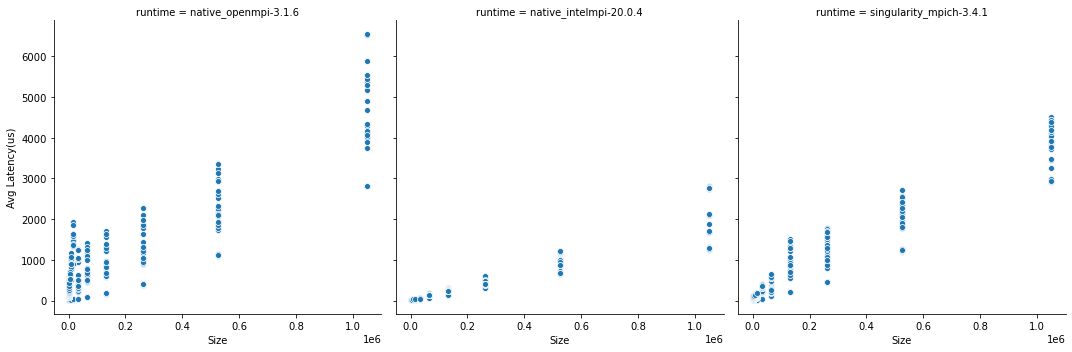

In [14]:
sns.relplot(
    data=df.set_index("osu_exe").loc["mpi/collective/osu_allgather"],
    x="Size",
    y="Avg Latency(us)",
    col="runtime"
)